#Imports

In [ ]:
!pip install tensorflow==2.11.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 21 kB/s 
     |████████████████████████████████| 1.7 MB 63.6 MB/s 
     |████████████████████████████████| 439 kB 67.5 MB/s 
     |████████████████████████████████| 6.0 MB 59.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import keras
from keras.models import Sequential
from keras.initializers import Constant
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.callbacks import ReduceLROnPlateau,CSVLogger
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,GlobalMaxPool1D,Embedding,Conv1D, GlobalMaxPooling1D, Bidirectional,LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
import shutil
import re
!pip install unidecode
!pip install contractions
import contractions
import unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 33.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 110 kB 16.8 MB/s 
     |████████████████████████████████| 287 kB 31.4 MB/s 


In [ ]:
!pip install nlpaug
import nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 19.8 MB/s 


In [ ]:
import nlpaug.augmenter.word as naw

In [ ]:
import nlpaug.augmenter.sentence as nas

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 37.8 MB/s 
     |████████████████████████████████| 7.6 MB 56.7 MB/s 
     |████████████████████████████████| 182 kB 69.7 MB/s 


In [ ]:
import transformers

In [ ]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data Preprocessing

In [ ]:
dataset1 = pd.read_csv('/content/drive/MyDrive/labeled_data.csv')


In [ ]:
def preprocess(text):
    text = unidecode.unidecode(text) 
    text = contractions.fix(text)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)                     
    text = re.sub('[\t\n]', ' ', text) 
    text = re.sub(r'www.[^ ]+', '', text)
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) 
    text = re.sub(r'https?://[^ ]+', '', text)
    text = re.sub('[^A-Za-z]+', ' ', text) 
    text = re.sub(' +', ' ', text) 
    text = text.strip().lower() 
    return text

In [ ]:
dataset1.tweet=dataset1.tweet.apply(lambda x: preprocess(x))

In [ ]:
dataset1

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt as a woman you should not complain about cl...
1,1,3,0,3,0,1,rt boy dats cold tyga dwn bad for cuffin dat h...
2,2,3,0,3,0,1,rt dawg rt you ever fuck a bitch and she start...
3,3,3,0,2,1,1,rt she look like a tranny
4,4,6,0,6,0,1,rt the shit you hear about me might be true or...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you s a muthaf in lie right his tl is trash no...
24779,25292,3,0,1,2,2,you have gone and broke the wrong heart baby a...
24780,25294,3,0,3,0,1,young buck want to eat dat nigguh like i are n...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
dataset1.drop('Unnamed: 0',axis=1,inplace=True)
dataset1.drop('count',axis=1,inplace=True)

#Data Augmentation

##Word augmenting

In [ ]:
def augment(text):
  aug=naw.SpellingAug()
  new=aug.augment(text)
  new=''.join(new)
  return new



In [ ]:
temp=dataset1['tweet'].apply(lambda x:augment(x))

In [ ]:
temp

0        rt as a womon you shoulud not camplain abot cl...
1        rd boy dats coln tyga dwn bed for cuffin dat h...
2        rt dawg rt youy ever fuck am bitch and sha sta...
3                               rd she look llike a tranny
4        rt thye shit you hear about e maight be truo o...
                               ...                        
24778    yuor so as muthaf in lie right fis tl is thash...
24779    you hwve gone ende brouke the rong heart baby ...
24780    youngh back want to eat dat nigguh like l are ...
24781                you got wold bitches tellin yuor lies
24782    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 24783, dtype: object

In [ ]:
temp=temp.tolist()

In [ ]:
augmenteddataset=dataset1

In [ ]:
augmenteddataset['tweet']=temp

In [ ]:
datasett=pd.concat([dataset1, augmenteddataset], axis=0)

In [ ]:
datasett.reset_index(inplace=True)

In [ ]:
datasett.drop('index',axis=1,inplace=True)


In [ ]:
datasett.to_csv('datasetforproject.csv',index=False)

In [ ]:
datasett

,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,2,rt as a womon you shoulud not camplain abot cl...
1,0,3,0,1,rd boy dats coln tyga dwn bed for cuffin dat h...
2,0,3,0,1,rt dawg rt youy ever fuck am bitch and sha sta...
3,0,2,1,1,rd she look llike a tranny
4,0,6,0,1,rt thye shit you hear about e maight be truo o...
...,...,...,...,...,...
49561,0,2,1,1,yuor so as muthaf in lie right fis tl is thash...
49562,0,1,2,2,you hwve gone ende brouke the rong heart baby ...
49563,0,3,0,1,youngh back want to eat dat nigguh like l are ...
49564,0,6,0,1,you got wold bitches tellin yuor lies


In [ ]:
temp=datasett[datasett['class']==0]

In [ ]:
datasett=pd.concat([datasett,temp],axis=0)

In [ ]:
datasett

,hate_speech,offensive_language,neither,class,tweet
0,0,0,3,2,rt as a womon you shoulud not camplain abot cl...
1,0,3,0,1,rd boy dats coln tyga dwn bed for cuffin dat h...
2,0,3,0,1,rt dawg rt youy ever fuck am bitch and sha sta...
3,0,2,1,1,rd she look llike a tranny
4,0,6,0,1,rt thye shit you hear about e maight be truo o...
...,...,...,...,...,...
49359,2,1,0,0,this gay is ht biger faggot omfg
49468,2,1,0,0,which ou of thoses mane's ti's move ofensive k...
49534,2,1,0,0,lou I pussy as nigga and i know it nigga
49559,3,0,0,0,yoy aye all niggers


In [ ]:
d=datasett['tweet']
k=datasett['class'].map({0: 'hate_speech', 1: 'offensive_language',2: 'neither'})
#c=df0['class']
df= pd.concat([d,k], axis=1)
hate, ofensive, neither = np.bincount(datasett['class'])
total = hate + ofensive + neither
print('Examples:\n    Total: {}\n    hate: {} ({:.2f}% of total)\n'.format(
    total, hate, 100 * hate / total))
print('Examples:\n    Total: {}\n    Ofensive: {} ({:.2f}% of total)\n'.format(
    total, ofensive, 100 * ofensive / total))
print('Examples:\n    Total: {}\n    Neither: {} ({:.2f}% of total)\n'.format(
    total, neither, 100 * neither / total))
    
x= datasett['tweet'].to_list()
y=datasett['class'].to_list()
#x2=dataset2['Tweet'].to_list()
#y2=dataset2['Class'].to_list()
texts = x
target = y

Examples:
    Total: 52426
    hate: 5720 (10.91% of total)

Examples:
    Total: 52426
    Ofensive: 38380 (73.21% of total)

Examples:
    Total: 52426
    Neither: 8326 (15.88% of total)



In [ ]:
len(texts)

52426

#Tokenizing

This part is inspired by : https://www.kaggle.com/code/kasivisu3109/bi-lstm-cnn-mlp-models-glove-embedding

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
vocab_length = len(tokenizer.word_index) + 1

In [ ]:
longest_sentence = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_sentence))

In [ ]:
train_padded_sentences = pad_sequences(tokenizer.texts_to_sequences(texts), length_long_sentence, padding='post')

#Glove embedding

In [ ]:
embeddings_dictionary = dict()
embedding_dim = 100

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-12-08 03:10:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-12-08 03:10:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-12-08 03:10:33--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
with open('glove.6B.100d.txt') as fp:
    for line in fp.readlines():
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype='float32')
        embeddings_dictionary[word] = vector_dimensions
embedding_matrix = np.zeros((vocab_length, embedding_dim))

In [ ]:
for word, index in tokenizer.word_index.items(): 
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

#Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target, 
    test_size=0.25
)

In [ ]:
y_train

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,


In [ ]:
X_train

array([[12741,   463,   662, ...,     0,     0,     0],
       [   11,    29,  2848, ...,     0,     0,     0],
       [   11,   187,  4362, ...,     0,     0,     0],
       ...,
       [   15,    10,    36, ...,     0,     0,     0],
       [ 1288,     9,  1175, ...,     0,     0,     0],
       [  260,    17,   293, ...,     0,     0,     0]], dtype=int32)

In [ ]:
X_train, x_val, y_train, y_val = train_test_split(
    X_train, 
    y_train,
    test_size=0.1 )

In [ ]:
y_train

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,


In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_val = np.asarray(x_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)

#Model

#hybrid model(our input)

##Architecture 1 Including attention

In [ ]:
from keras.layers import Layer
import keras.backend as K

In [ ]:
#Defining attention layers
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
      return super(attention,self).get_config()


#Approach 1 (Best)

In [ ]:
model=Sequential([Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], input_length=length_long_sentence),
              Dropout(0.5),
              Conv1D(32,2,padding='valid', activation='relu'),
              Conv1D(64,2,padding='valid',activation='relu'),
              GlobalMaxPooling1D(),
              tf.keras.layers.Reshape((1,64,), input_shape=(None,64)),
              attention(),
              tf.keras.layers.Reshape((1,64,), input_shape=(None,64)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,74,), input_shape=(None,74)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,74,), input_shape=(None,74)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,74,), input_shape=(None,74)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,74,), input_shape=(None,74)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,74,), input_shape=(None,74)),
              GlobalMaxPool1D(),
              BatchNormalization(),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              Dropout(0.8),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              Dropout(0.8),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              #Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              #Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              Dense(length_long_sentence, activation = "relu"),
              #Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              Dense(length_long_sentence, activation = "relu"),
              #Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              #Dropout(0.5),
              Dense(3, activation = 'softmax')])
#

ValueError: ignored

#Model 2 

In [ ]:
model=Sequential([Embedding(input_dim=embedding_matrix.shape[0], output_dim=embedding_matrix.shape[1], weights = [embedding_matrix], input_length=length_long_sentence),
              Dropout(0.5),
              Conv1D(32,2,padding='valid', activation='relu'),
              
              Conv1D(64,2,padding='valid',activation='relu'),
              GlobalMaxPooling1D(),
              tf.keras.layers.Reshape((1,64,), input_shape=(None,64)),
              attention(),
              tf.keras.layers.Reshape((1,64,), input_shape=(None,64)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,80,), input_shape=(None,80)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,80,), input_shape=(None,80)),
              Bidirectional(LSTM(length_long_sentence, return_sequences = True, recurrent_dropout=0.5)),
              attention(),
              tf.keras.layers.Reshape((1,80,), input_shape=(None,80)),
              GlobalMaxPool1D(),
              BatchNormalization(),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              Dropout(0.8),
              Dense(length_long_sentence, activation = "relu",kernel_regularizer=tf.keras.regularizers.L2(0.01)),
              Dropout(0.8),
              Dense(length_long_sentence, activation = "relu"),
              Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              Dropout(0.5),
              Dense(length_long_sentence, activation = "relu"),
              Dropout(0.5),
              Dense(3, activation = 'softmax')])
#

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:

batch_size= 128
history = model.fit(
    X_train, 
    y_train, 
    epochs = 30,
    batch_size = batch_size,
    validation_data = (x_val, y_val),
    verbose = 1
)

Epoch 1/30
277/277 [==============================] - 72s 113ms/step - loss: 1.1074 - accuracy: 0.7281 - val_loss: 0.6756 - val_accuracy: 0.7342
Epoch 2/30
277/277 [==============================] - 29s 106ms/step - loss: 0.6281 - accuracy: 0.7302 - val_loss: 0.5995 - val_accuracy: 0.7342
Epoch 3/30
277/277 [==============================] - 32s 116ms/step - loss: 0.5705 - accuracy: 0.7516 - val_loss: 0.5362 - val_accuracy: 0.8080
Epoch 4/30
277/277 [==============================] - 32s 116ms/step - loss: 0.5369 - accuracy: 0.7792 - val_loss: 0.5461 - val_accuracy: 0.7342
Epoch 5/30
277/277 [==============================] - 26s 93ms/step - loss: 0.5284 - accuracy: 0.7816 - val_loss: 0.5080 - val_accuracy: 0.7988
Epoch 6/30
277/277 [==============================] - 31s 112ms/step - loss: 0.5181 - accuracy: 0.7863 - val_loss: 0.5033 - val_accuracy: 0.8034
Epoch 7/30
277/277 [==============================] - 28s 100ms/step - loss: 0.5114 - accuracy: 0.7941 - val_loss: 0.5033 - val_acc

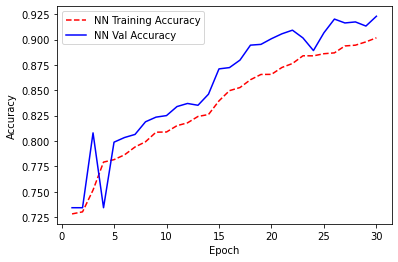

In [ ]:
  # Get training and validation accuracy histories
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, 30 + 1)

# Visualize accuracy history
plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['NN Training Accuracy', 'NN Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

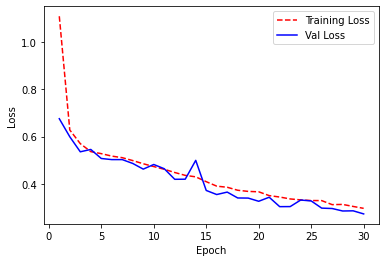

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:

preds = model.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)

410/410 [==============================] - 7s 8ms/step - loss: 0.2677 - accuracy: 0.9245


In [ ]:
X_test

array([[    7,    63,    86, ...,     0,     0,     0],
       [   11,  3201,     1, ...,     0,     0,     0],
       [    7,   132,    53, ...,     0,     0,     0],
       ...,
       [    1,   438,  8801, ...,     0,     0,     0],
       [19156,     3,    73, ...,     0,     0,     0],
       [  350,  1673,    17, ...,     0,     0,     0]], dtype=int32)

In [ ]:
preds= np.argmax(model.predict(X_test), axis=-1)
#
    
print(classification_report(y_test,preds.round() ))
print(confusion_matrix(y_test, preds.round()))

410/410 [==============================] - 6s 8ms/step
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1406
           1       0.98      0.95      0.96      9646
           2       0.79      0.93      0.85      2055

    accuracy                           0.92     13107
   macro avg       0.85      0.88      0.86     13107
weighted avg       0.93      0.92      0.93     13107

[[1082  101  223]
 [ 238 9120  288]
 [  89   50 1916]]


In [ ]:
tf.keras.utils.plot_model(model, to_file='architecture2_profanity_and_hatespeech.pdf', show_shapes=True)

In [ ]:
model.save('/content/gdrive/MyDrive/weightshatespeechbest')


# BERT

In [ ]:
X = dataset1['tweet'].values
Y=dataset1['class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    Y, 
    test_size=0.25
)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, 
    y_train, 
    test_size=0.25
)

In [ ]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [ ]:
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from tokenizers import BertWordPieceTokenizer
from keras.layers import Input
from tensorflow.keras.models import Model

In [ ]:
d=dataset1['tweet']
k=dataset1['class'].map({0: 'hate_speech', 1: 'offensive_language',2: 'neither'})
#c=df0['class']
df= pd.concat([d,k], axis=1)
hate, ofensive, neither = np.bincount(dataset1['class'])
total = hate + ofensive + neither
print('Examples:\n    Total: {}\n    hate: {} ({:.2f}% of total)\n'.format(
    total, hate, 100 * hate / total))
print('Examples:\n    Total: {}\n    Ofensive: {} ({:.2f}% of total)\n'.format(
    total, ofensive, 100 * ofensive / total))
print('Examples:\n    Total: {}\n    Neither: {} ({:.2f}% of total)\n'.format(
    total, neither, 100 * neither / total))
    
x= dataset1['tweet'].to_list()
y=dataset1['class'].to_list()
#x2=dataset2['Tweet'].to_list()
#y2=dataset2['Class'].to_list()
texts = x
target = y

Examples:
    Total: 24783
    hate: 1430 (5.77% of total)

Examples:
    Total: 24783
    Ofensive: 19190 (77.43% of total)

Examples:
    Total: 24783
    Neither: 4163 (16.80% of total)



In [ ]:
def fast_encode(texts, tokenizer, chunk_size=256, maxlen=512):
    """
    Encoder for encoding the text into sequence of integers for BERT Input
    """
    tokenizer.enable_truncation(max_length=maxlen)
    tokenizer.enable_padding(length=maxlen)
    all_ids = []
    
    for i in tqdm(range(0, len(texts), chunk_size)):
        text_chunk = texts[i:i+chunk_size].tolist()
        encs = tokenizer.encode_batch(text_chunk)
        all_ids.extend([enc.ids for enc in encs])
    
    return np.array(all_ids)

In [ ]:
#IMP DATA FOR CONFIG
import tensorflow as tf
AUTO = tf.data.experimental.AUTOTUNE


# Configuration
EPOCHS = 20
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
MAX_LEN = 192

In [ ]:
# First load the real tokenizer
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
# Save the loaded tokenizer locally
tokenizer.save_pretrained('.')
# Reload it with the huggingface tokenizers library
fast_tokenizer = BertWordPieceTokenizer('vocab.txt', lowercase=False)
fast_tokenizer

Tokenizer(vocabulary_size=119547, model=BertWordPiece, unk_token=[UNK], sep_token=[SEP], cls_token=[CLS], pad_token=[PAD], mask_token=[MASK], clean_text=True, handle_chinese_chars=True, strip_accents=None, lowercase=False, wordpieces_prefix=##)

In [ ]:
X_train

array(['jk i would be a bitch if i got them done',
       'rt yeah i know it is jeff s book the one where he admits to beating prisoners and lying abo',
       'rt yeah bitches', ...,
       'i have never seen this part of pussy town before lolololol the end of this song thoo',
       'oh yeah especially winston niccas lmao rt think i will not lol these niggas',
       'rt iggy s sextape is probably gon be trash the nigga she made it with is ugly'],
      dtype=object)

In [ ]:
df1 = pd.DataFrame(X_train)
df2 = pd.DataFrame(X_val)
df3 = pd.DataFrame(X_test)
df4 = pd.DataFrame(y_train)
df5 = pd.DataFrame(y_val)

In [ ]:
df6=pd.concat([df1, df4], axis=1)
df7=pd.concat([df2, df5], axis=1)

In [ ]:
df6.head(100)

,0,0
0,jk i would be a bitch if i got them done,1
1,rt yeah i know it is jeff s book the one where...,2
2,rt yeah bitches,1
3,rt ever leave me around your bitch i mma get h...,1
4,rt play pussy get fucked,1
...,...,...
95,bitch i am not coming no more you said your ma...,1
96,rt trassshhh rt them s that come out this week...,2
97,rt i am a little teapot short and irish artist...,2
98,you are the tool for posting a vid of a dude p...,1


In [ ]:
df3.columns =['Tweet']
df6.columns =['Tweet', 'label']
df7.columns =['Tweet', 'label']

In [ ]:
df7.head(100)

,Tweet,label
0,rt sinclair hoes do not care how fat they are ...,1
1,i do not chase no bitches just chase my,1
2,this hoe mimi said i hurt my hand bitch her th...,1
3,mmm where the fuck is that at honkey you need ...,1
4,legion of jig,2
...,...,...
95,rt when you give all ya hoes up for that one g...,1
96,apparently this little pussy cannot converse n...,1
97,so is my pussy,1
98,omg my mom did it on christmas once if i had n...,1


In [ ]:
df3.head(100)

,Tweet
0,if you jump someone you are a bitch regardless...
1,bruh we can finally roll like rednecks drug de...
2,post a picture of that pussy get likes
3,suck my dick tacos el negro better
4,got to clear ya throat of all that pussy eh rt...
...,...
95,bullets through a nigguh tru jeans
96,rt the crows warned you to stay away from the ...
97,girls are fucking retarded my back started cra...
98,see i peeped it amp pussy is power


In [ ]:
x_train = fast_encode(df6.Tweet.astype(str), fast_tokenizer, maxlen=MAX_LEN)
x_valid = fast_encode(df7.Tweet.astype(str), fast_tokenizer, maxlen=MAX_LEN)
x_test = fast_encode(df3.Tweet.astype(str), fast_tokenizer, maxlen=MAX_LEN)

y_train = df6.label.values
y_valid = df7.label.values

  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_train, y_train))
    .repeat()
    .shuffle(2048)
    .batch(BATCH_SIZE)
    .prefetch(AUTO)
)

valid_dataset = (
    tf.data.Dataset
    .from_tensor_slices((x_valid, y_valid))
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices(x_test)
    .batch(BATCH_SIZE)
)
test_dataset2 = (
    tf.data.Dataset
    .from_tensor_slices(x_test)
    .batch(BATCH_SIZE)
)

In [ ]:
def build_model(transformer, max_len=512):
    """
    function for training the BERT model
    """
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(3, activation='softmax')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
def build_model(transformer, max_len=512):
    """
    function for training the BERT model
    """
    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(3, activation='softmax')(cls_token)
    
    model = Model(inputs=input_word_ids, outputs=out)
    model.trainable = True
    regularizer = tf.keras.regularizers.l2(0.01)
    
    for layer in model.layers:
      for attr in ['kernel_regularizer']:
        if hasattr(layer, attr):
          setattr(layer, attr, regularizer)
    model.compile(Adam(lr=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
%%time
with strategy.scope():
    transformer_layer = (
        transformers.TFDistilBertModel
        .from_pretrained('distilbert-base-multilingual-cased')
    )
    model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()

Some layers from the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertModel: ['vocab_transform', 'activation_13', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.
Instructions for updating:
Lambda fuctions will be

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 192)]            0         
                                                                 
 tf_distil_bert_model (TFDis  TFBaseModelOutput(last_h  134734080
 tilBertModel)               idden_state=(None, 192,             
                             768),                               
                              hidden_states=None, att            
                             entions=None)                       
                                                                 
 tf.__operators__.getitem (S  (None, 768)              0         
 licingOpLambda)                                                 
                                                                 
 dense (Dense)               (None, 3)                 2307      
                                                             

In [ ]:
n_steps = x_train.shape[0] // BATCH_SIZE
train_history = model.fit(
    train_dataset,
    steps_per_epoch=n_steps,
    validation_data=valid_dataset,
    epochs=EPOCHS
)

Epoch 1/20
871/871 [==============================] - 381s 437ms/step - loss: 0.6836 - accuracy: 0.7758 - val_loss: 0.6654 - val_accuracy: 0.7766
Epoch 2/20
871/871 [==============================] - 324s 372ms/step - loss: 0.6763 - accuracy: 0.7733 - val_loss: 0.6662 - val_accuracy: 0.7766
Epoch 3/20
871/871 [==============================] - 324s 372ms/step - loss: 0.6709 - accuracy: 0.7750 - val_loss: 0.6640 - val_accuracy: 0.7766
Epoch 4/20
871/871 [==============================] - 324s 373ms/step - loss: 0.6649 - accuracy: 0.7759 - val_loss: 0.6645 - val_accuracy: 0.7766
Epoch 5/20
871/871 [==============================] - 324s 372ms/step - loss: 0.6678 - accuracy: 0.7736 - val_loss: 0.6637 - val_accuracy: 0.7766
Epoch 6/20
871/871 [==============================] - 324s 372ms/step - loss: 0.6617 - accuracy: 0.7760 - val_loss: 0.6671 - val_accuracy: 0.7766
Epoch 7/20
871/871 [==============================] - 323s 371ms/step - loss: 0.6652 - accuracy: 0.7750 - val_loss: 0.6625 -

In [ ]:
tf.keras.utils.plot_model(model, to_file='BERTsentiment.pdf', show_shapes=True)


In [ ]:
# Get training and validation accuracy histories
training_acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, 3 + 1)

# Visualize accuracy history
plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['2L NN Training Accuracy', '2L NN Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

NameError: ignored

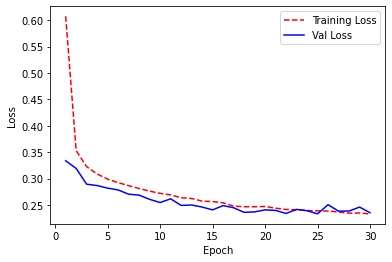

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
preds = model.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)

1523/1523 [==============================] - 17s 10ms/step - loss: 0.2338 - accuracy: 0.9311


In [ ]:
preds= np.argmax(model.predict(X_test), axis=-1)
#printing classification_report & confusion_matrix
print(classification_report(y_test,preds ))
print(confusion_matrix(y_test, preds))

1523/1523 [==============================] - 10s 6ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     39286
           1       0.88      0.75      0.81      9450

    accuracy                           0.93     48736
   macro avg       0.91      0.86      0.89     48736
weighted avg       0.93      0.93      0.93     48736

[[38354   932]
 [ 2343  7107]]


In [ ]:
n_steps = x_valid.shape[0] // BATCH_SIZE
train_history_2 = model.fit(
    valid_dataset.repeat(),
    steps_per_epoch=n_steps,
    epochs=EPOCHS*2
)

In [ ]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df['Tweet']).reshape(-1, 1), np.array(df['label']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['Tweet', 'label']);

In [ ]:
X = train_os['Tweet'].values
y = train_os['label'].values

In [ ]:
seed = 1020
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

In [ ]:
X_test = dataset['Tweet'].values
y_test = dataset['label'].values

In [ ]:
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [ ]:
clf = CountVectorizer()
X_train_cv =  clf.fit_transform(X_train)
X_test_cv = clf.transform(X_test)

In [ ]:
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_cv)
X_train_tf = tf_transformer.transform(X_train_cv)
X_test_tf = tf_transformer.transform(X_test_cv)

In [ ]:
X_train_tf

In [ ]:
nb_clf = MultinomialNB()

In [ ]:
nb_clf.fit(X_train_tf, y_train)

In [ ]:
nb_pred = nb_clf.predict(X_test_tf)

In [ ]:
def tokenize(data,max_len=167) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(np.asarray(encoded['input_ids']).astype('float32'))
        attention_masks.append(np.asarray(encoded['attention_mask']).astype('float32'))
    return np.asarray(input_ids),np.asarray(attention_masks)

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')


In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train)
val_input_ids, val_attention_masks = tokenize(X_valid)
test_input_ids, test_attention_masks = tokenize(X_test)

In [ ]:
train_input_ids[0]

In [ ]:
train_input_ids.reshape(1, -1).shape

In [ ]:
tf. convert_to_tensor(train_input_ids.reshape(1, -1))

In [ ]:
#ensure the sets are tokenized
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

In [ ]:
def create_model(bert_model, max_len=167):
    
    ##params###
    opt = tf.keras.optimizers.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    
    embeddings = bert_model([input_ids,attention_masks])[1]
    
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    
    model.compile(opt, loss=loss, metrics=accuracy)
    
    
    return model

In [ ]:
model = create_model(bert_model)
model.summary()

In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, validation_data=([val_input_ids,val_attention_masks], y_valid), epochs=4, batch_size=32)

In [ ]:
tf.keras.utils.plot_model(model, to_file='BERT.png', show_shapes=True)


In [ ]:
# Get training and validation accuracy histories
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, 30 + 1)

# Visualize accuracy history
plt.figure()
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, val_acc, 'b-')
plt.legend(['2L NN Training Accuracy', '2L NN Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
training_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure()
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
preds = model.evaluate(X_test, y_test, batch_size=32, verbose=1, sample_weight=None)

In [ ]:
preds= np.argmax(model.predict(X_test), axis=-1)
#printing classification_report & confusion_matrix
print(classification_report(y_test,preds ))
print(confusion_matrix(y_test, preds))

#Model testing and predictions

In [ ]:
length_long_sentence

41

In [ ]:
def getpredictions(text):
  model = keras.models.load_model('/content/drive/MyDrive/weightshatespeechbest/')
  preprocess(text)
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts([text])
  vocab_length = len(tokenizer.word_index) + 1
  padded_sentence = pad_sequences(
  tokenizer.texts_to_sequences([text]), 
    37, 
    padding='post'
  )
  
  preds=model.predict(padded_sentence)
  return np.argmax(preds)





In [ ]:
getpredictions('I love you')

1/1 [==============================] - 2s 2s/step


2

In [ ]:
getpredictions('I love tomatoes')

1/1 [==============================] - 2s 2s/step


2